# Introduction to Prophet

Before running this notebook you'll need to run the following:

```Bash

conda install -c conda-forge fbprophet
```

`fbprophet` will take some time to install.

Here is the [paper](https://peerj.com/preprints/3190/) on Prophet. Prophet is a decomposable time series model, meaning it has different model components: namely trend, periodicity, and holidays.

In [3]:
import pandas as pd
from fbprophet import Prophet

pd.set_option('display.max_columns', 99)

In [2]:
import sys

sys.path

['/opt/anaconda3/lib/python36.zip',
 '/opt/anaconda3/lib/python3.6',
 '/opt/anaconda3/lib/python3.6/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.6/site-packages',
 '/opt/anaconda3/lib/python3.6/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/dilly/.ipython']

## Importing and cleaning data

The corpus we'll be looking at is Austin fire per day - what manipulations do we need to make?

In [4]:
df = pd.read_csv('../data/AFD_Fire.csv')

In [5]:
# lets munge the data one step at a time 

In [15]:
df['daily'] = df['CalendarYear'].astype(str) + ' ' + df['Month'] + ' ' + df['DayOfMonth'].astype(str)

In [17]:
df['daily'] = pd.to_datetime(df['daily'])

In [21]:
df_prophet = df.groupby(['daily'])['MasterIncidentNumber'].count().reset_index()

## Fitting Prophet

Prophet uses an API very similar to sklearn's. It has some quirks of its own, though.

Prophet will expect the columns in the data to be named `ds` and `y`. `ds` will be the time index, and `y` will be the variable we're interested in modeling.

In [23]:
df_prophet

,daily,MasterIncidentNumber
0,2013-01-01,10
1,2013-01-02,3
2,2013-01-03,9
3,2013-01-04,5
4,2013-01-05,14
...,...,...
1088,2015-12-27,3
1089,2015-12-28,4
1090,2015-12-29,6
1091,2015-12-30,5


In [25]:
df_prophet.columns = ['ds', 'y']

df_prophet

,ds,y
0,2013-01-01,10
1,2013-01-02,3
2,2013-01-03,9
3,2013-01-04,5
4,2013-01-05,14
...,...,...
1088,2015-12-27,3
1089,2015-12-28,4
1090,2015-12-29,6
1091,2015-12-30,5


## Making Predictions

Prophet model objects have a method `make_future_dataframe()`, which we'll use to create a dataframe that will be passed forward to make predictions on:

In [35]:
# let's predict an entirely new year...
model = Prophet()
model.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Store Prophet's predictions as `forecast`:

In [36]:
predictions_df = model.make_future_dataframe(365)

In [37]:
forecast = model.predict(predictions_df)

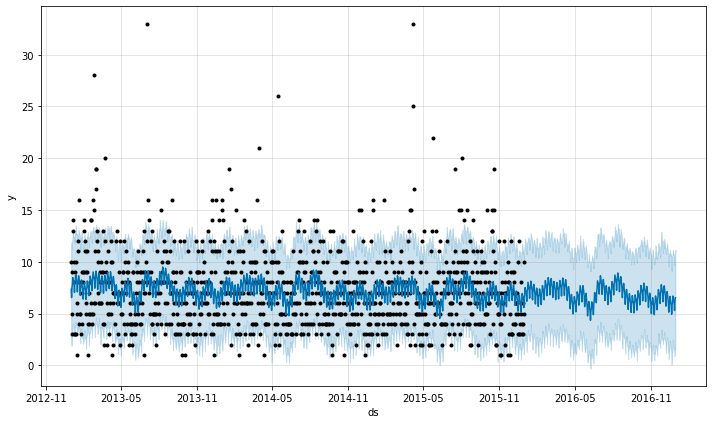

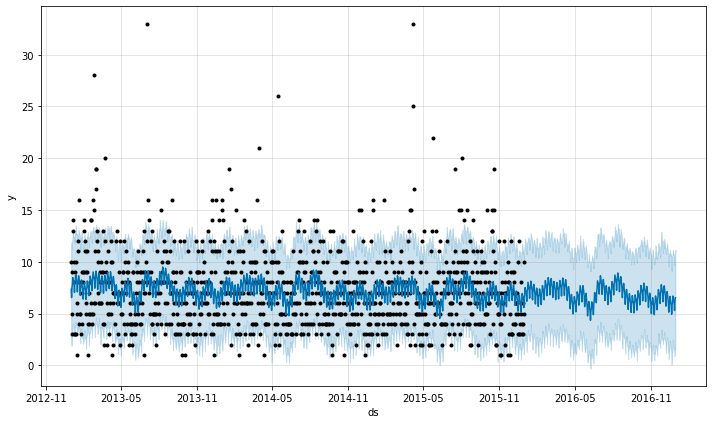

In [39]:
model.plot(forecast)

## Prophet's inbuilt plotting features

Prophet allows us to plot the existing data alongside its predicted future, as well as plotting the components of the model, using `.plot()` and `.plot_components()` methods.

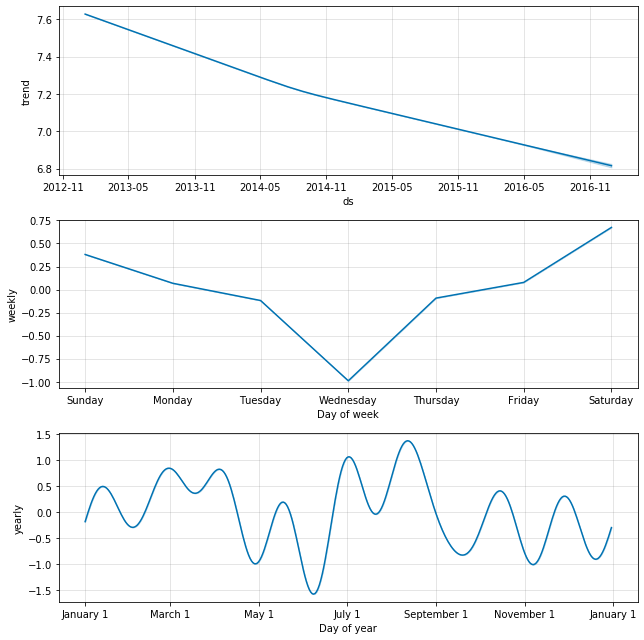

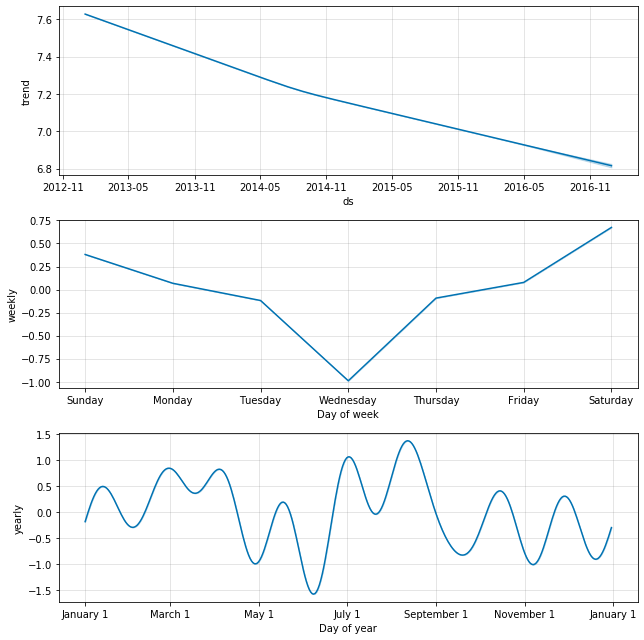

In [41]:
model.plot_components(forecast)

## Let's try a new data set 

If you're worried about processing power, try cutting the dataset in half: 

``` python 

df_power = df_power.iloc[int(df.shape[0]/2)]
```

In [42]:
df_power = pd.read_csv('../data/DOM_hourly.csv', )

In [43]:
df_power['ds'] = pd.to_datetime(df_power['ds'])
m = Prophet()
m.fit(df_power)

/opt/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [44]:
future_df = m.make_future_dataframe((24*100), freq='H')
predictions = m.predict(future_df)

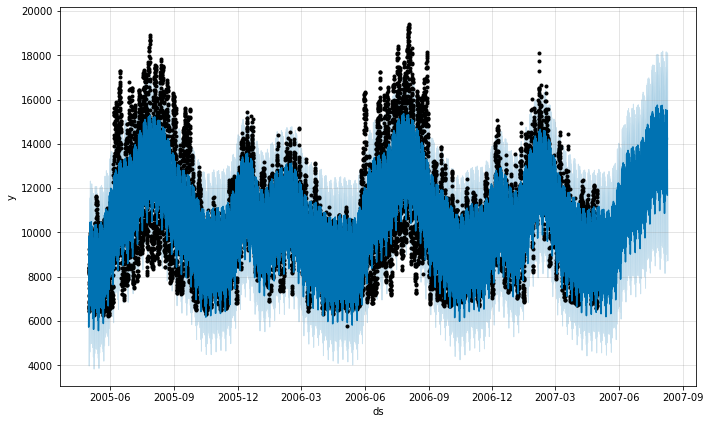

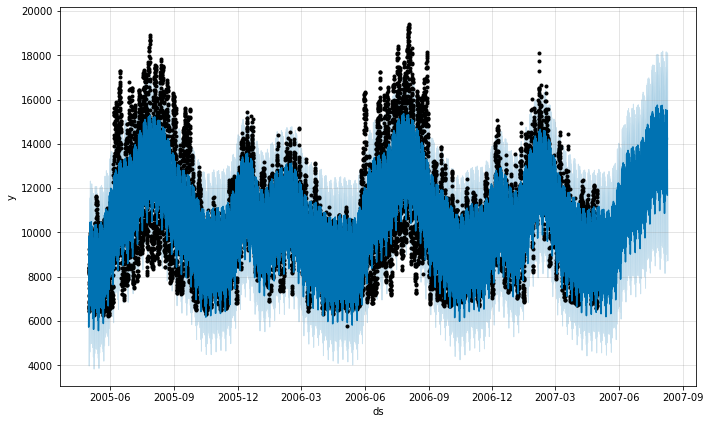

In [45]:
m.plot(predictions)

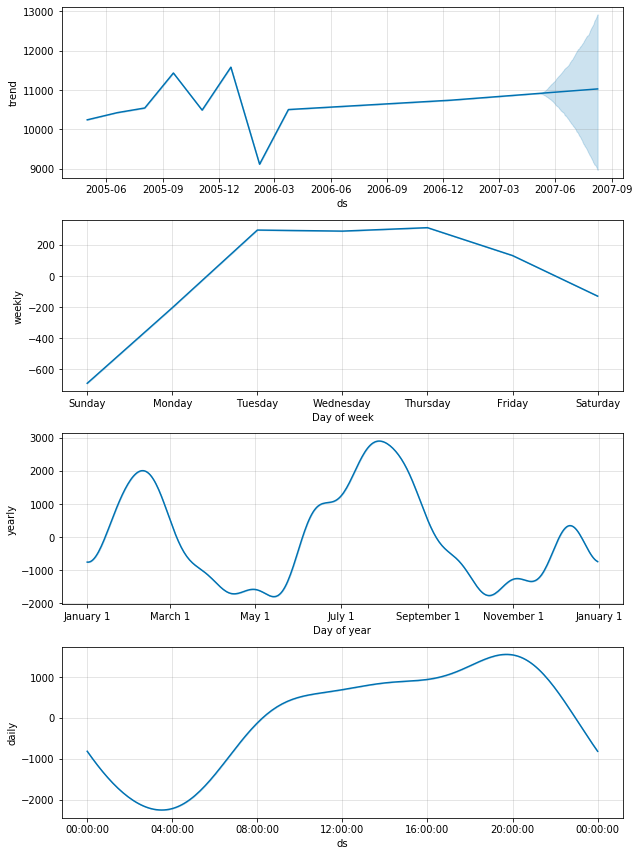

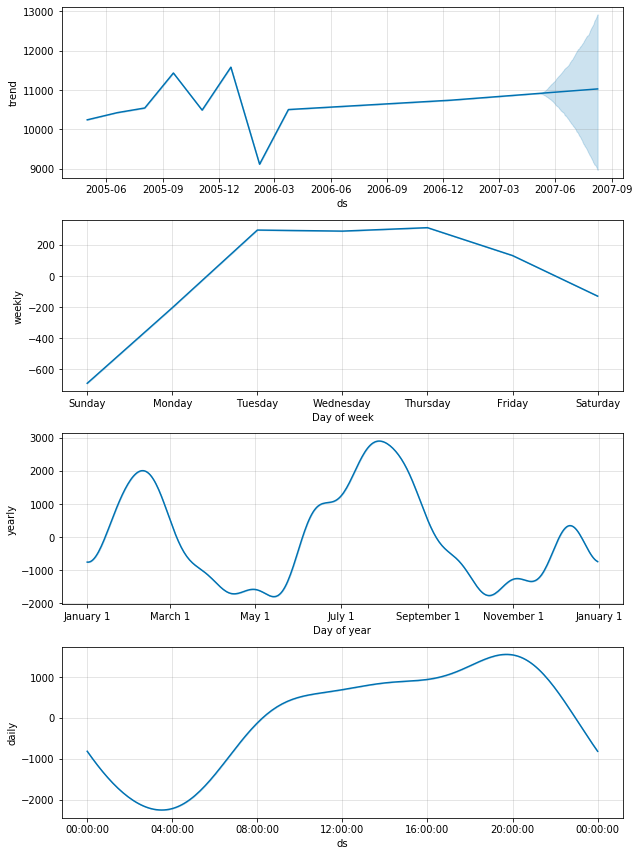

In [46]:
m.plot_components(predictions)